In [1]:
# Importing Libraries
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
Dataset_dir=os.getcwd()+"\\Faces_Dataset"
faces={}
for Person in os.listdir(Dataset_dir):
    Person_Face_Dir=Dataset_dir+"\\"+Person
    for file in os.listdir(Person_Face_Dir):
        image=cv2.imread(Person_Face_Dir+"\\"+file,cv2.IMREAD_GRAYSCALE)
        faces[Person+"_"+file]=image

In [20]:
os.getcwd()

'C:\\Users\\USER\\Kartik_JComponent'

In [3]:
len(faces)

402

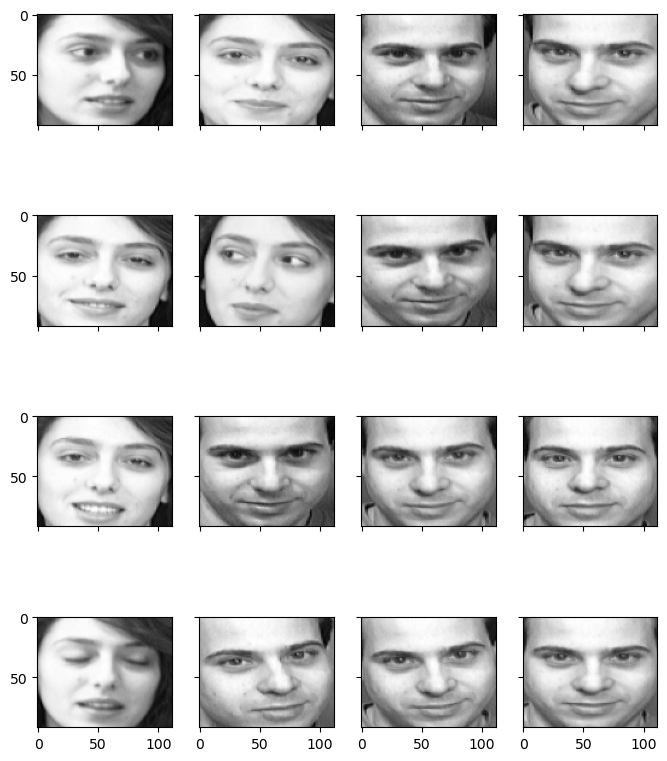

In [4]:
fig, axes = plt.subplots(4,4,sharex=True,sharey=True,figsize=(8,10))
faceimages = list(faces.values())[-16:] # take last 16 images
for i in range(16):
    axes[i%4][i//4].imshow(faceimages[i], cmap="gray")
plt.show()

In [5]:
faceshape = list(faces.values())[0].shape
print("Face images shape:", faceshape)

Face images shape: (92, 112)


In [6]:
print(list(faces.keys())[:5])

['s1_1.pgm', 's1_10.pgm', 's1_2.pgm', 's1_3.pgm', 's1_4.pgm']


In [7]:
classes = set(filename.split("_")[0] for filename in faces.keys())
print("Number of Person:", len(classes))
print("Number of pictures:", len(faces))

Number of Person: 40
Number of pictures: 402


In [8]:
# Take classes 1-39 for eigenfaces, keep entire class 40 and
# image 10 of class 39 as out-of-sample test
facematrix = []
facelabel = []
for key,val in faces.items():
    if key.startswith("s40_"):
        continue # this is our test set
    if key == "s39_10.pgm":
        continue # this is our test set
    facematrix.append(val.flatten())
    facelabel.append(key.split("_")[0])

# Create facematrix as (n_samples,n_pixels) matrix
facematrix = np.array(facematrix)

In [9]:
# Apply PCA to extract eigenfaces
from sklearn.decomposition import PCA

pca = PCA().fit(facematrix)

In [10]:
print(pca.explained_variance_ratio_)

[2.48799905e-01 1.08108454e-01 8.86280673e-02 5.38155864e-02
 3.52473607e-02 2.83530687e-02 2.40231676e-02 2.25932916e-02
 2.04986332e-02 1.69655421e-02 1.45186885e-02 1.32578476e-02
 1.24522214e-02 1.18489433e-02 1.07296514e-02 1.01801154e-02
 9.76531946e-03 8.92205177e-03 8.42640500e-03 7.77082517e-03
 7.38391633e-03 7.28033502e-03 6.98325781e-03 6.29397979e-03
 6.09113842e-03 5.69602467e-03 5.37964797e-03 5.22484274e-03
 4.94663057e-03 4.83185328e-03 4.82099959e-03 4.19849774e-03
 4.06716911e-03 3.98311005e-03 3.77193042e-03 3.70299594e-03
 3.46652885e-03 3.33798171e-03 3.26475316e-03 3.19338996e-03
 3.09324619e-03 2.93022755e-03 2.76831312e-03 2.65973283e-03
 2.53862751e-03 2.44662197e-03 2.38659416e-03 2.31376885e-03
 2.25825037e-03 2.19984865e-03 2.13191842e-03 2.09078313e-03
 1.99609443e-03 1.96026720e-03 1.93371845e-03 1.88611104e-03
 1.81811345e-03 1.77503148e-03 1.75128570e-03 1.69595352e-03
 1.64759670e-03 1.60224924e-03 1.59461418e-03 1.51611452e-03
 1.49801430e-03 1.450821

In [11]:
i=0
sum_1=0
for eigen_value in pca.explained_variance_ratio_:
    if sum_1>=0.9:
        break
    else:
        sum_1=sum_1+eigen_value
        i=i+1
    
print("We have to take ",i,"eigen vlaues for 90% variance")

We have to take  62 eigen vlaues for 90% variance


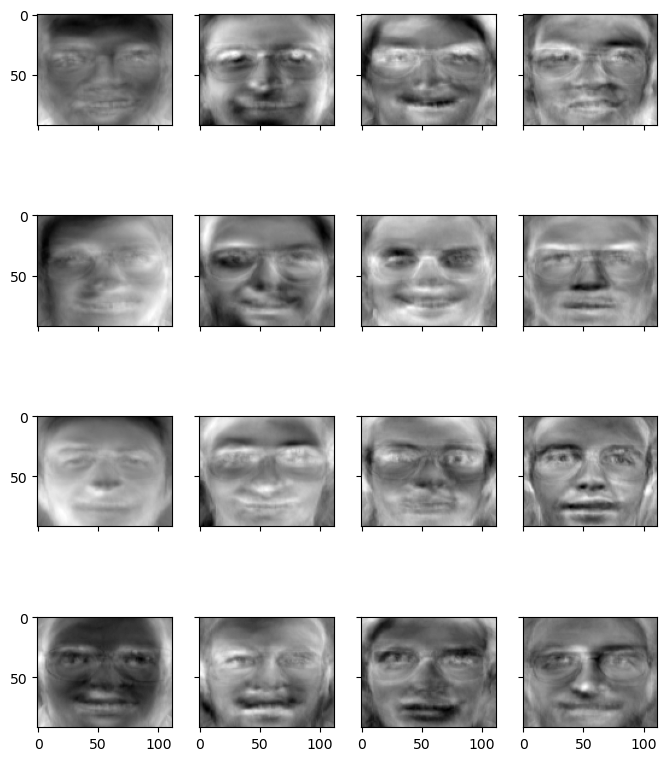

In [12]:
# Take the first i principal components as eigenfaces
n_components = i
eigenfaces = pca.components_[:n_components]

# Show the first 16 eigenfaces
fig, axes = plt.subplots(4,4,sharex=True,sharey=True,figsize=(8,10))
for i in range(16):
    axes[i%4][i//4].imshow(eigenfaces[i].reshape(faceshape), cmap="gray")
plt.show()

In [13]:
# Generate weights as a KxN matrix where K is the number of eigenfaces and N the number of samples
weights = eigenfaces @ (facematrix - pca.mean_).T

In [14]:
weights = []
for i in range(facematrix.shape[0]):
    weight = []
    for j in range(n_components):
        w = eigenfaces[j] @ (facematrix[i] - pca.mean_)
        weight.append(w)
    weights.append(weight)

Best match s22 with Manhattan distance 0.000000


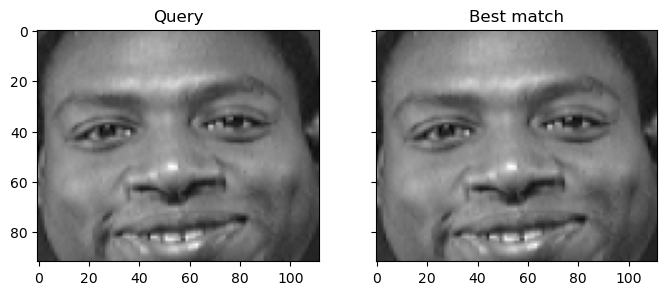

Is the Prediction Correct(1,0): 1
Dataset Updated Successfully.


In [15]:
# Test sample image
# Image Path
dim1=(112,92)
dim2=(92,112)
Image_path=os.getcwd()+"\\Test\\10.pgm"
image=cv2.imread(Image_path,cv2.IMREAD_GRAYSCALE)

haar_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

faces_rect = haar_cascade.detectMultiScale(image, 1.1, 9)
for (x,y,w,h) in faces_rect:
    image=image[y:y+h,x:x+w]
    resized = cv2.resize(image, dim1, interpolation = cv2.INTER_AREA)
    cv2.imwrite(os.getcwd()+"\\Temp.png",resized)

query = cv2.imread(os.getcwd()+"\\Temp.png",cv2.IMREAD_GRAYSCALE).reshape(1,-1)
query_weight = eigenfaces @ (query - pca.mean_).T
manhattan_distance = np.abs(weights - query_weight.T).sum(axis=1)
best_match = np.argmin(manhattan_distance)
print("Best match %s with Manhattan distance %f" % (facelabel[best_match], manhattan_distance[best_match]))

# Visualize
fig, axes = plt.subplots(1,2,sharex=True,sharey=True,figsize=(8,6))
axes[0].imshow(query.reshape(dim2), cmap="gray")
axes[0].set_title("Query")
axes[1].imshow(facematrix[best_match].reshape(faceshape), cmap="gray")
axes[1].set_title("Best match")
plt.show()
prediction=int(input("Is the Prediction Correct(1,0): "))

if(prediction):
    output_dir=os.getcwd()+"\\Faces_Dataset\\"+facelabel[best_match]
    cv2.imwrite(output_dir+"\\"+str(1+len(os.listdir(output_dir)))+".png",resized)
    print("Dataset Updated Successfully.")
else:
    name=input("Enter Person Name : ")
    output_dir=os.getcwd()+"\\Faces_Dataset\\"+name
    if(not os.path.exists(output_dir)):
        print("New Entry Created")
        os.mkdir(output_dir)
    else:
        print("Person Found in Data Base")
    cv2.imwrite(output_dir+"\\"+str(1+len(os.listdir(output_dir)))+".png",resized)
    print("Dataset Updated Successfully.")